In [1]:
!git lfs install
!git clone https://huggingface.co/datasets/RUCAIBox/Style-Transfer
!mv Style-Transfer/gyafc_em.tgz .
!mv Style-Transfer/gyafc_fr.tgz .
!tar -zxf gyafc_em.tgz
!tar -zxf gyafc_fr.tgz

Error: Failed to call git rev-parse --git-dir: exit status 128 
Git LFS initialized.
Cloning into 'Style-Transfer'...
remote: Enumerating objects: 11, done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 11
Unpacking objects: 100% (11/11), 1.62 KiB | 554.00 KiB/s, done.


In [17]:
import json
with open('style_generation.json', 'r') as f:
    data=json.load(f)

dict_list = data["details"]
pred_scores=[]
pred_labels = []
for d in dict_list:
  pred_scores.append(d["score"])
  if(d["label"] == "LABEL_0"):
    pred_labels.append(0)
  else:
    pred_labels.append(1)
# pred_labels = [d["score"] for d in dict_list]
# pred_scores = [d["score"] for d in dict_list]


with open('style_gyafc_em_test_tgt.json', 'r') as f:
    data=json.load(f)

dict_list = data["details"]
scores=[]
labels = []
for d in dict_list:
  scores.append(d["score"])
  if(d["label"] == "LABEL_0"):
    labels.append(0)
  else:
    labels.append(1)
# scores = [d["score"] for d in dict_list]

with open('gyafc_em/test.src', 'r') as f:
    inp = [line.strip() for line in f]

with open('gyafc_em/test.tgt', 'r') as f:
    out = [line.strip() for line in f]

with open('generation_em.txt', 'r') as f:
    pred = [line.strip() for line in f]

print(len(inp))
print(len(pred_labels))
print(len(pred_scores))
print(len(scores))
print(len(labels)) 

1416
1416
1416
1416
1416


In [18]:
import pandas as pd
df = pd.DataFrame({'sourcetext': inp,'targettext': out,'predictedtext':pred, 'true_label': labels, 'pred_label': pred_labels, 'pred_score': pred_scores})
df["num_tokens"] = df.apply(
    lambda x: len(x["sourcetext"].split(" ")), axis=1
)
df.head()

,sourcetext,targettext,predictedtext,true_label,pred_label,pred_score,num_tokens
0,Is Any Baby Really A Freak.,"['Is any baby really a freak.', 'Is any baby r...",Is any baby really a Freak?,0,0,0.984546,6
1,"aspen colorado has he best music festivals, yo...","['Aspen Colorado has he best music festivals, ...",Aspen Colorado has one of the best music festi...,0,1,0.995043,20
2,You can get almost anything on ebay!,"['You can get almost anything on ebay!', 'You ...",You can get almost anything on eBay!,1,1,0.935910,7
3,everybody is Dying to get in,"['everybody is dying to get in.', 'Everyone is...",Everyone is dying to get in.,1,1,0.904629,6
4,not idiots like 50 cent and his whole Gay unit...,"[""I'm not referring to people like 50 cent and...",Not idiots like 50 Cent and his entire Gay uni...,1,1,0.977824,18


In [7]:
import json
with open('style_generation_fr.json', 'r') as f:
    data=json.load(f)

dict_list = data["details"]
pred_scores_fr=[]
pred_labels_fr = []
for d in dict_list:
  pred_scores_fr.append(d["score"])
  if(d["label"] == "LABEL_0"):
    pred_labels_fr.append(0)
  else:
    pred_labels_fr.append(1)
# pred_labels = [d["score"] for d in dict_list]
# pred_scores = [d["score"] for d in dict_list]


with open('style_gyafc_fr_test_tgt.json', 'r') as f:
    data=json.load(f)

dict_list = data["details"]
print('dict length:', len(dict_list))
scores_fr=[]
labels_fr = []
for d in dict_list:
  scores_fr.append(d["score"])
  if(d["label"] == "LABEL_0"):
    labels_fr.append(0)
  else:
    labels_fr.append(1)
# scores = [d["score"] for d in dict_list]

with open('gyafc_fr/test.src', 'r') as f:
    inp = [line.strip() for line in f]

print(len(inp))
print(len(pred_labels_fr))
print(len(pred_scores_fr))
print(len(scores_fr))
print(len(labels_fr)) 

dict length: 1332
1332
1332
1332
1332
1332


In [9]:
import pandas as pd
df_fr = pd.DataFrame({'text': inp, 'true_label': labels_fr, 'pred_label': pred_labels_fr, 'pred_score': pred_scores_fr})
df_fr["num_tokens"] = df_fr.apply(
    lambda x: len(x["text"].split(" ")), axis=1
)
df_fr.head()

,text,true_label,pred_label,pred_score,num_tokens
0,And so what if it is a rebound relationship fo...,1,1,0.920801,13
1,Good luck in your search for the one!,1,1,0.979168,8
2,WHY DOES EVERYONE SEEM TO WANT SOMEONE THAT TH...,1,1,0.985934,17
3,Do you like to argue and fight???,1,1,0.905788,7
4,"So if you're set on that, that's the way to go!!",1,1,0.979499,11


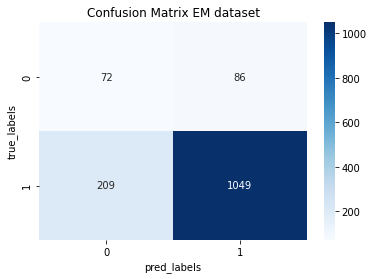

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score



# calculate the confusion matrix using pd.crosstab
cm = pd.crosstab(df['true_label'], df['pred_label'], rownames=['true_label'], colnames=['pred_label'])

# create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])

# set the axis labels and title
plt.xlabel('pred_labels')
plt.ylabel('true_labels')
plt.title('Confusion Matrix EM dataset')

# show the plot
plt.show()

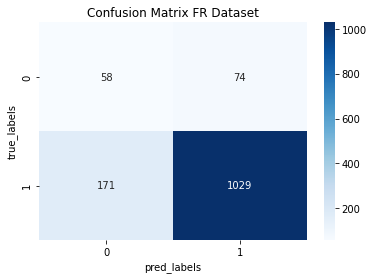

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score



# calculate the confusion matrix using pd.crosstab
cm = pd.crosstab(df_fr['true_label'], df_fr['pred_label'], rownames=['true_label'], colnames=['pred_label'])

# create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])

# set the axis labels and title
plt.xlabel('pred_labels')
plt.ylabel('true_labels')
plt.title('Confusion Matrix FR Dataset')

# show the plot
plt.show()

In [9]:
from sklearn.metrics import classification_report

report = classification_report(df['true_label'], df['pred_label'], target_names=['0', '1'])
# report = classification_report(actual, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.26      0.46      0.33       158
           1       0.92      0.83      0.88      1258

    accuracy                           0.79      1416
   macro avg       0.59      0.64      0.60      1416
weighted avg       0.85      0.79      0.82      1416



In [13]:
from sklearn.metrics import classification_report

report = classification_report(df_fr['true_label'], df_fr['pred_label'], target_names=['0', '1'])
# report = classification_report(actual, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.25      0.44      0.32       132
           1       0.93      0.86      0.89      1200

    accuracy                           0.82      1332
   macro avg       0.59      0.65      0.61      1332
weighted avg       0.87      0.82      0.84      1332



In [10]:
acc_by_numtokens = df.groupby("num_tokens").apply(
    lambda x: {
        "accuracy": accuracy_score(y_true=x["true_label"], y_pred=x["pred_label"]),
        "support": x["true_label"].count(),
    }
)

acc_by_numtokens_df = pd.DataFrame(
    acc_by_numtokens.tolist(), index=acc_by_numtokens.index
)

In [15]:
acc_by_numtokens_fr = df_fr.groupby("num_tokens").apply(
    lambda x: {
        "accuracy": accuracy_score(y_true=x["true_label"], y_pred=x["pred_label"]),
        "support": x["true_label"].count(),
    }
)

acc_by_numtokens_df_fr = pd.DataFrame(
    acc_by_numtokens_fr.tolist(), index=acc_by_numtokens_fr.index
)

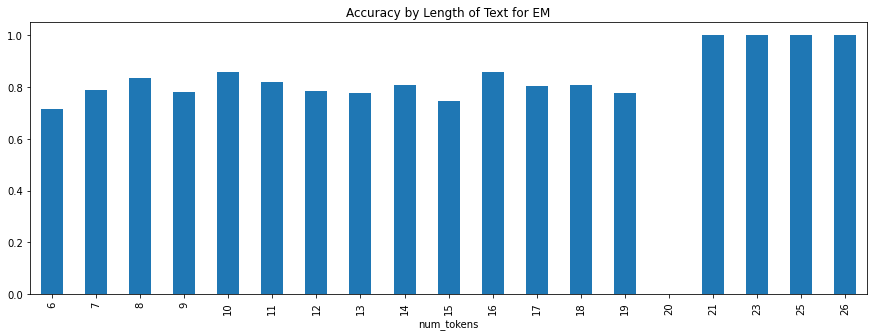

In [16]:
acc_by_numtokens_df["accuracy"].plot(
    kind="bar", figsize=(15, 5), title="Accuracy by Length of Text for EM"
)

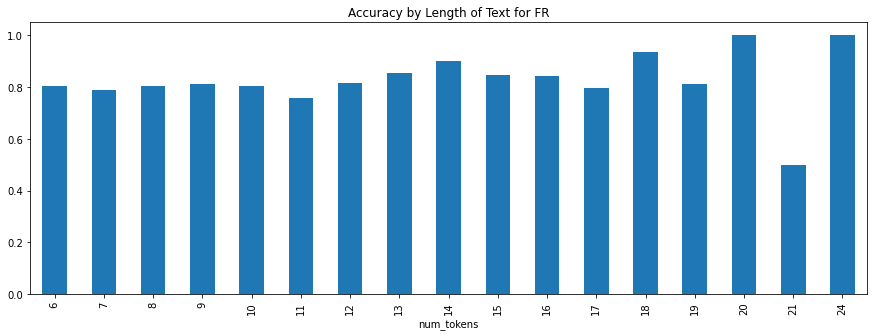

In [17]:
acc_by_numtokens_df_fr["accuracy"].plot(
    kind="bar", figsize=(15, 5), title="Accuracy by Length of Text for FR"
)

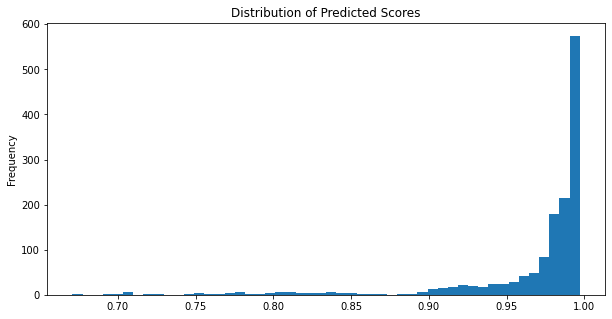

In [18]:
df.pred_score.plot(
    kind="hist", bins=50, title="Distribution of Predicted Scores", figsize=(10, 5)
)

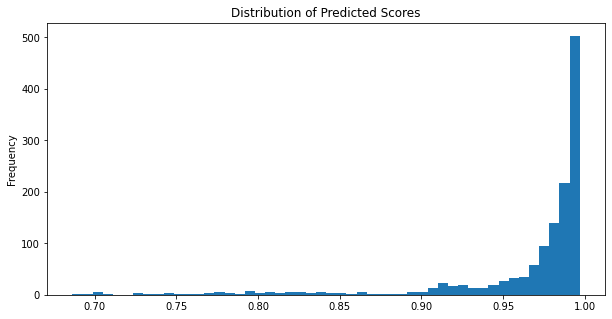

In [19]:
df_fr.pred_score.plot(
    kind="hist", bins=50, title="Distribution of Predicted Scores", figsize=(10, 5)
)

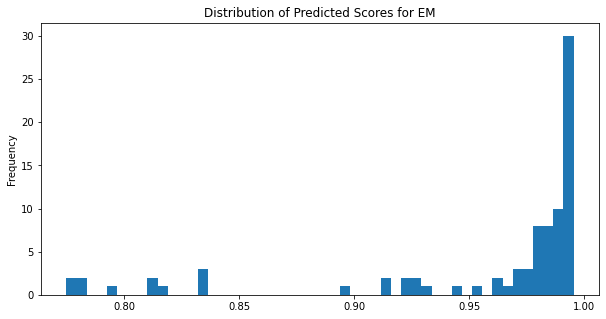

In [20]:
df[
    (df.true_label == 0) & (df.pred_label == 1)
].sort_values(by="pred_score", ascending=False).pred_score.plot(
    kind="hist", bins=50, title="Distribution of Predicted Scores for EM", figsize=(10, 5)
)

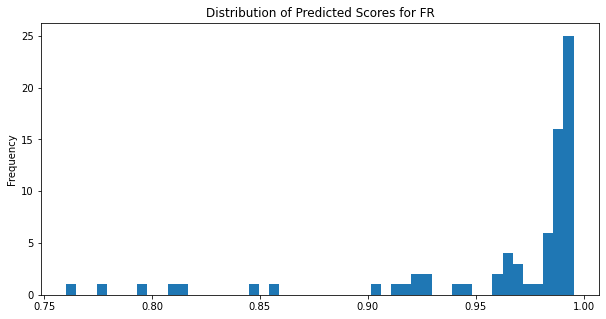

In [21]:
df_fr[
    (df_fr.true_label == 0) & (df_fr.pred_label == 1)
].sort_values(by="pred_score", ascending=False).pred_score.plot(
    kind="hist", bins=50, title="Distribution of Predicted Scores for FR", figsize=(10, 5)
)

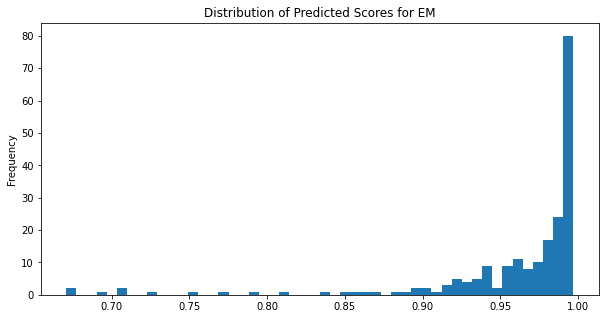

In [22]:
df[
    (df.true_label == 1) & (df.pred_label == 0)
].sort_values(by="pred_score", ascending=False).pred_score.plot(
    kind="hist", bins=50, title="Distribution of Predicted Scores for EM", figsize=(10, 5)
)

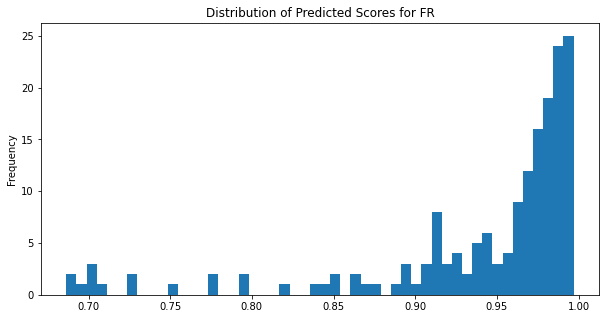

In [23]:
df_fr[
    (df_fr.true_label == 1) & (df_fr.pred_label == 0)
].sort_values(by="pred_score", ascending=False).pred_score.plot(
    kind="hist", bins=50, title="Distribution of Predicted Scores for FR", figsize=(10, 5)
)

In [13]:
def highlight_classification_errors(df,kind, n=50):
    # assume the actual and predicted labels are stored in two columns of a DataFrame called 'df'
    # the 'kind' argument specifies whether to highlight false positives (fp) or false negatives (fn)
    
    # get the indices of the misclassified records
    if kind == "fp":
        misclassified_indices = df[(df['true_label'] == 0) & (df['pred_label'] == 1)].head(n).index
    elif kind == "fn":
        misclassified_indices = df[(df['true_label'] == 1) & (df['pred_label'] == 0)].head(n).index
    else:
        raise ValueError("Invalid kind argument, should be 'fp' or 'fn'.")
    
    # create an empty list to store the misclassified records
    records = []
    
    # loop over the misclassified indices and add the records to the list
    for i in misclassified_indices:
        actual_label = df.loc[i, 'true_label']
        predicted_label = df.loc[i, 'pred_label']
        record_text = df.loc[i, 'sourcetext']
        records.append(f"Record #{i} classified as {predicted_label}, when actual label is {actual_label}: \n\t {record_text}")
        
        # find the index of the corresponding record with the opposite predicted label
        opposite_predicted_label = 1 - predicted_label
        opposite_predicted_index = df[(df['true_label'] == actual_label) & (df['pred_label'] == opposite_predicted_label)].index[0]
        opposite_record_text = df.loc[opposite_predicted_index, 'targettext']
        records.append(f"Here's its {opposite_predicted_label} labeled counterpart #{opposite_predicted_index}: \n\t {opposite_record_text}")
        
        # add a separator between the records
        records.append('-'*70)
    
    # join the list of misclassified records into a single string
    output_string = '\n'.join(records)
    
    # return the output string
    return output_string

In [14]:
styled_cm = highlight_classification_errors(df, kind="fp", n=50)

In [19]:
df

,sourcetext,targettext,predictedtext,true_label,pred_label,pred_score,num_tokens
0,Is Any Baby Really A Freak.,"['Is any baby really a freak.', 'Is any baby r...",Is any baby really a Freak?,0,0,0.984546,6
1,"aspen colorado has he best music festivals, yo...","['Aspen Colorado has he best music festivals, ...",Aspen Colorado has one of the best music festi...,0,1,0.995043,20
2,You can get almost anything on ebay!,"['You can get almost anything on ebay!', 'You ...",You can get almost anything on eBay!,1,1,0.935910,7
3,everybody is Dying to get in,"['everybody is dying to get in.', 'Everyone is...",Everyone is dying to get in.,1,1,0.904629,6
4,not idiots like 50 cent and his whole Gay unit...,"[""I'm not referring to people like 50 cent and...",Not idiots like 50 Cent and his entire Gay uni...,1,1,0.977824,18
...,...,...,...,...,...,...,...
1411,I LUBB IT.. [8] ILL KEEP U MY DIRRTY LITTLE SE...,['I very much enjoy it. I will keep this unple...,I love it. I will keep you my little girl.,1,1,0.983442,12
1412,I guess it is the blond from american idol,['I believe that it is the blonde from America...,I guess it is the blond from American Idol.,1,1,0.970933,9
1413,(no offance) If you can answer that then it's ...,"['No offence, but if you are able to answer th...","If you can answer that, then it is the same fo...",1,1,0.992202,14
1414,"the song was called epic, i cant remember the ...","['The song was called ""Epic""; I can not rememb...",The song was called Epic. I cannot remember th...,1,1,0.995315,16


In [20]:
def print_text_triplet(metric_df):

    for i, row in metric_df.iterrows():
        print(f"Style Classifier Score: {row.pred_score}")
        print(f"True Label: {row.true_label}")
        print(f"Pred label: {row.pred_label}")
        print(f"SOURCE_TEXT: {row.sourcetext}")
        print(f"TARGET_TEXT: {row.targettext}")
        print(f"PREDICTED_TEXT: {row.predictedtext}")
        print("----------------------------------------------------")
        print()
print_text_triplet(
    df[df.true_label != df.pred_label].sort_values(
        "pred_score", ascending=False
    )[:10]
)

Style Classifier Score: 0.9970366954803467
True Label: 1
Pred label: 0
SOURCE_TEXT: The Chinese get the Rizza, the Jizza, and the Ghost Face Killer!!
TARGET_TEXT: ['In China, they have The Rizza, The Jizza, and the Ghost Face Killer.', '"The Chinese get \'The Rizza,\' \'The Jizza,\' and the \'Ghost Face Killa\'!"', 'The Chinese have the Rizza, the Jizza, and the Ghost Face Killer.', 'They get Rizza, Jizza, and Ghost Face Killer.']
PREDICTED_TEXT: The Chinese get the Rizza, the Jizza, and the Ghost Face Killer.
----------------------------------------------------

Style Classifier Score: 0.9969937801361084
True Label: 1
Pred label: 0
SOURCE_TEXT: rabbit feet only work on ppl, not the rabbit they came from
TARGET_TEXT: ['Rabbit feet only are effective for people, not the rabbit they stemmed from.', 'Rabbit feet are only effective on people, not the rabbits from which they come.', 'Rabbits fees are only effective for people, not the rabbits from which they come.', 'Rabbit feet only work o

In [15]:
print(highlight_classification_errors(df, kind="fp", n=50))

Record #1 classified as 1, when actual label is 0: 
	 aspen colorado has he best music festivals, you sit all over the moutians its  on and just hang out
Here's its 0 labeled counterpart #0: 
	 ['Is any baby really a freak.', 'Is any baby really a freak?', 'Is Any Baby really strange?', 'Is anyone really that crazy?']
----------------------------------------------------------------------
Record #12 classified as 1, when actual label is 0: 
	 i betta go and ask another stupid question lol....
Here's its 0 labeled counterpart #0: 
	 ['Is any baby really a freak.', 'Is any baby really a freak?', 'Is Any Baby really strange?', 'Is anyone really that crazy?']
----------------------------------------------------------------------
Record #59 classified as 1, when actual label is 0: 
	 My dad looks like Paul Newman, and my ex looked like king kong
Here's its 0 labeled counterpart #0: 
	 ['Is any baby really a freak.', 'Is any baby really a freak?', 'Is Any Baby really strange?', 'Is anyone rea

In [28]:
print(highlight_classification_errors(df_fr, kind="fp", n=50))

Record #5 classified as 1, when actual label is 0: 
	 My ex of 3 years cheated.
Here's its 0 labeled counterpart #32: 
	 No seriously, think about howmany cocky girls are out there.
----------------------------------------------------------------------
Record #79 classified as 1, when actual label is 0: 
	 And I hope to God it doesn't ever pass!
Here's its 0 labeled counterpart #32: 
	 No seriously, think about howmany cocky girls are out there.
----------------------------------------------------------------------
Record #101 classified as 1, when actual label is 0: 
	 Maybe your young, I don't know.
Here's its 0 labeled counterpart #32: 
	 No seriously, think about howmany cocky girls are out there.
----------------------------------------------------------------------
Record #103 classified as 1, when actual label is 0: 
	 aint nothing in the world like a big boned gurl!
Here's its 0 labeled counterpart #32: 
	 No seriously, think about howmany cocky girls are out there.
-----------

In [37]:
styled_cm_fr = highlight_classification_errors(df_fr, kind="fp", n=50)

In [14]:
styled_cm

pred_label,0,1
true_label,,
0,72,86
1,209,1049


In [38]:
styled_cm_fr

pred_label,0,1
true_label,,
0,58,74
1,171,1029
